# US Baby Names 1880-2010

# Since the data set is split into files by year, one of the first things to do is to assemble all of the data into a single DataFrame and further to add a year field. This is easy to do using pandas.concat:

In [2]:
import pandas as pd
import csv

years = range(1880, 2011)

pieces = []
columns = ['name','sex','birth']

for year in years:
    path = 'yob%d.txt'%year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [3]:
names = pd.concat(pieces, ignore_index=True)
# There are a couple things to note here. First, remember that concat glues the DataFrame
# objects together row-wise by default. Secondly, you have to pass ignore_index=True
# because we’re not interested in preserving the original row numbers returned from
# read_csv. So we now have a very large DataFrame containing all of the names data:

In [4]:
names

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692627,Zymaire,M,5,2010
1692628,Zyonne,M,5,2010
1692629,Zyquarius,M,5,2010
1692630,Zyran,M,5,2010


## With this data in hand, we can already start aggregating the data at the year and sex level using groupby or pivot_table

In [6]:
total_birth = names.pivot_table(values='birth',index='year',columns='sex',aggfunc='sum')

In [7]:
total_birth

sex,F,M
year,,
1880,90994,110490
1881,91953,100735
1882,107847,113686
1883,112321,104625
1884,129019,114442
...,...,...
2006,1901070,2055119
2007,1922448,2075235
2008,1890718,2039947


In [8]:
# the same above thing can be done using groupby

In [12]:
total_birth_groupby = names.groupby(['year','sex'])['birth'].sum().unstack()

In [13]:
total_birth_groupby

sex,F,M
year,,
1880,90994,110490
1881,91953,100735
1882,107847,113686
1883,112321,104625
1884,129019,114442
...,...,...
2006,1901070,2055119
2007,1922448,2075235
2008,1890718,2039947


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

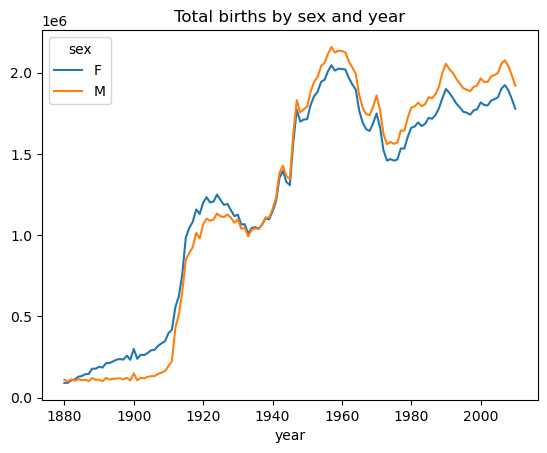

In [15]:
total_birth.plot(title='Total births by sex and year')